In [3]:
print('JAI BAJARANG BALI')

JAI BAJARANG BALI


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [5]:
df = pd.read_csv(r"C:\Users\Hp\OneDrive\Desktop\udemytest.csv")
df.head(3)

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262


In [6]:
df.shape

(20, 2)

In [7]:
df.isnull().sum()

x    0
y    0
dtype: int64

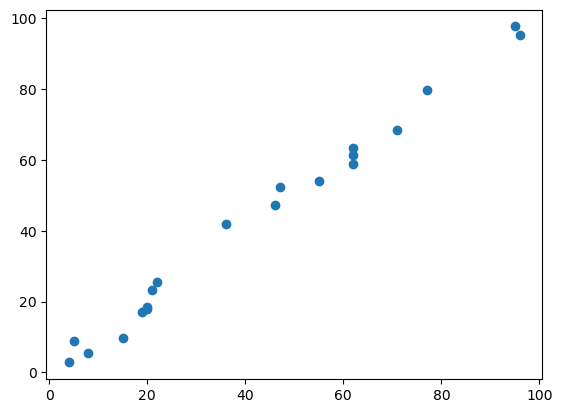

In [8]:
plt.scatter(df['x'], df['y'])

In [9]:
# correaltion
df.corr()

,x,y
x,1.000000,0.994848
y,0.994848,1.000000


C:\Users\Hp\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


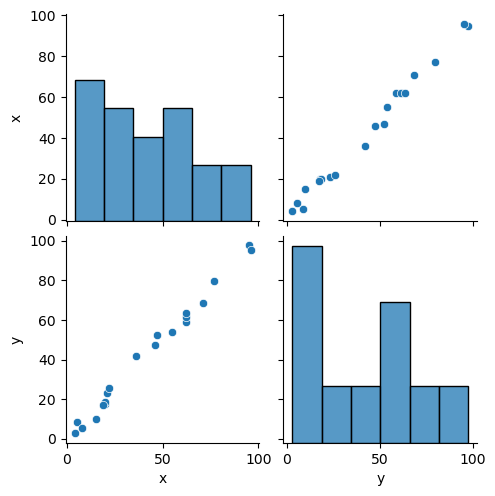

In [10]:
sns.pairplot(df)

In [11]:
x = df[['x']]   # input variable must be 2d or a dataframe not series coz there can be multiple inputs 
y = df['y'] # output variable can be 1d or series coz there is only one o/p all the time

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
x_train, x_test , y_train , y_test = train_test_split(x,y,test_size = 0.25 , random_state = 42)

In [14]:
# standardization ,, to make mean = 0 and variance = 1
from sklearn.preprocessing import StandardScaler

In [15]:
ss = StandardScaler()
x_train = ss.fit_transform(x_train)  # now x_train have mean = 0 and variance = 1
x_test = ss.transform(x_test)
# here we only do transform coz fit is used to find the original mean and variance and put in formulla 
# that is z_score = xi - mean/ variance and based on it we transform our test data on basic of x_train
# mean and variance coz we does'nt want to fatch mean and variance of x_test so our model knew about 
#test data called data leakage , we want to keep our x_test data secret from our model

In [16]:
# apply linear regression
from sklearn.linear_model import LinearRegression

In [17]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [18]:
print("coefficient ", reg.coef_)
print('intercept', reg.intercept_)

coefficient  [29.96545689]
intercept 40.353446256266665


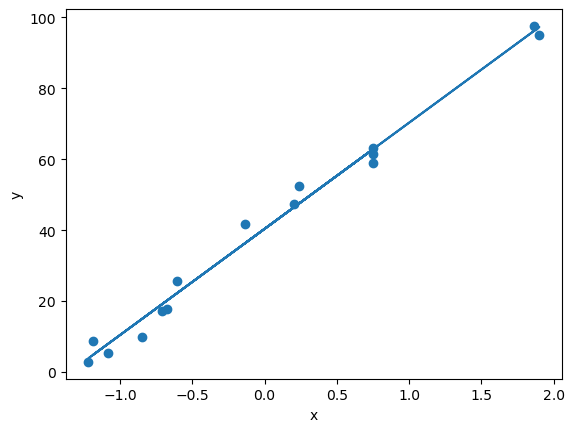

In [19]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train))
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [20]:
# prediction for test data
x_train.shape ,  y_train.shape

((15, 1), (15,))

In [21]:
y_pred = reg.predict(x_test)
y_pred

array([78.01190658, 55.66066214, 71.91611264, 21.11782983, 20.10186418])

In [26]:
# performance matrix
from sklearn.metrics import mean_squared_error , mean_absolute_error

In [27]:
mse = mean_squared_error(y_test , y_pred)
mae = mean_absolute_error(y_test , y_pred)
rmse = np.sqrt(mse)
(mse, mae, rmse)

(4.817341831583072, 2.0939362397352594, 2.1948443752537607)

In [29]:
# r2_score
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
score

0.9918580074675569

In [36]:
# adjusted r2_score
n = len(y_test)
p = x_test.shape[1]

adj_r2_score = 1 - ( (1-score)*(n-1)/(n-p-1) )
adj_r2_score

0.9891440099567426

In [38]:
# linear regression using OLS method
import statsmodels.api as sm

In [44]:
model = sm.OLS(x_train, y_train).fit()

In [45]:
pred = model.predict(x_test)
pred

array([ 0.01484776,  0.00603524,  0.01244434, -0.00758411, -0.00798468])

In [48]:
model.summary()

C:\Users\Hp\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.354
Model:                            OLS   Adj. R-squared (uncentered):              0.308
Method:                 Least Squares   F-statistic:                              7.673
Date:                Thu, 10 Oct 2024   Prob (F-statistic):                      0.0150
Time:                        14:46:33   Log-Likelihood:                         -18.007
No. Observations:                  15   AIC:                                      38.01
Df Residuals:                      14   BIC:                                      38.72
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
y              0.0118      0.004      2.770      0.015       0.003       0.021
==============================================================================
Omnibus:                        1.547   Durbin-Watson:                   1.057
Prob(Omnibus):                  0.461   Jarque-Bera (JB):                1.253
Skew:                           0.589   Prob(JB):                        0.534
Kurtosis:                       2.213   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# predict new data
ss1 =  ss.transform([[72]])
reg.predict(ss1)

C:\Users\Hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([72.93207829])